# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [23]:
u1 = np.array([[4], [9], [6]])

u2 = np.array([[6], [8], [8]])

u3 = np.array([[0], [9], [6]])
print("--------u1------------\n ",u1)
print("--------u2------------\n ",u2)
print("--------u3------------\n ",u3)
rank=np.linalg.matrix_rank(np.block([u1, u2, u3]))
print("--------rank([u1, u2, u3])------------\n",rank)

--------u1------------
  [[4]
 [9]
 [6]]
--------u2------------
  [[6]
 [8]
 [8]]
--------u3------------
  [[0]
 [9]
 [6]]
--------rank([u1, u2, u3])------------
 3


In [2]:
#type your code here:



--------u1------------
[[4]
 [9]
 [6]]
---------------------
--------u2------------
[[6]
 [8]
 [8]]
---------------------
--------u3------------
[[0]
 [9]
 [6]]
---------------------
--------rank([u1, u2, u3])------------
3
---------------------


#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

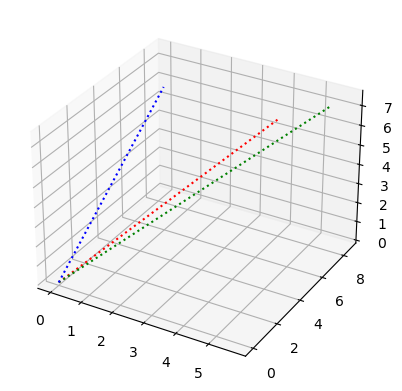

In [4]:
r=np.arange(0,1,.05)
ax=plt.axes(projection='3d')
ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')
ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')
ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')

### ---------------------------------------------------Write your answer here--------------------------------------------
they are not mutually orthogonal






### --------------------------------------------------------------------------------------------------------------------------------

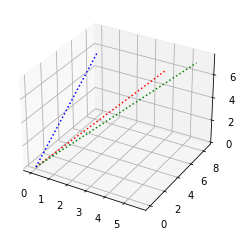

In [3]:
#type your code here


#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

--------v1------------
 [[4]
 [9]
 [6]]
--------v2------------
 [[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
--------v1.v2------------
 [[0.]]


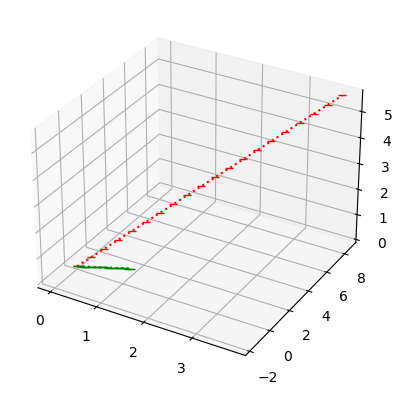

In [45]:
v1=u1
v2=u2-((v1.T.dot(u2)/(v1.T.dot(v1)))*v1)

r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')


ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r_:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g_:')

print("--------v1------------\n",v1)
print("--------v2------------\n",v2)
print("--------v1.v2------------\n",v1.T.dot(v2))

--------v1------------
[[4]
 [9]
 [6]]
---------------------
--------v2------------
[[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
---------------------
--------v1 . v2------------
[[0.]]
---------------------


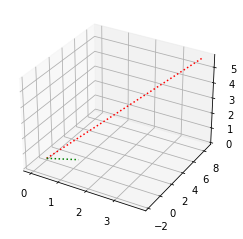

In [4]:
#type your code here


#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [55]:
v3=u3-((v1.T.dot(u3)/(v1.T.dot(v1)))*v1)-(((v2.T.dot(u3)/(v2.T.dot(v2))))*v2)
print("--------v3------------\n",v3)
print("--------v3.v1------------\n",v3.T.dot(v1))
print("--------v3.v2------------\n",v3.T.dot(v2))


--------v3------------
 [[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
--------v3.v1------------
 [[-2.66453526e-15]]
--------v3.v2------------
 [[-2.22044605e-16]]


In [5]:
#type your code here


--------v3------------
[[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
---------------------
--------v3 . v1------------
[[-1.77635684e-15]]
---------------------
--------v3 . v2------------
[[8.8817842e-16]]
---------------------


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

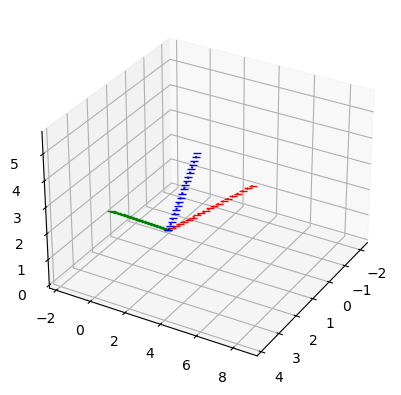

In [59]:

r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.view_init(30, 30)

ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r_:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g_:')
ax.plot3D(r * v3[0], r * v3[1], r * v3[2], 'b_:')

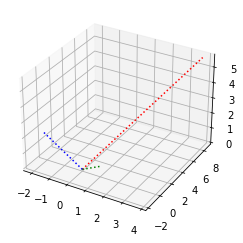

In [6]:
#type your code here


#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [90]:
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)
Q=np.block([w1,w2,w3])


In [91]:
print("--------w1------------\n",w1)
print("--------w2------------\n",w2)
print("--------w3------------\n",w3)
print("--------Q-----------\n",Q)
print("------Q.T @ Q------------\n",Q.T @ Q)
print("------unv(Q)--------\n",np.linalg.inv(Q))

--------w1------------
 [[0.34684399]
 [0.78039897]
 [0.52026598]]
--------w2------------
 [[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
--------w3------------
 [[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
--------Q-----------
 [[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
------Q.T @ Q------------
 [[ 1.00000000e+00 -5.55111512e-17 -1.11022302e-16]
 [-5.55111512e-17  1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16 -1.11022302e-16  1.00000000e+00]]
------unv(Q)--------
 [[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]


In [7]:
#type your code here:


--------w1------------
[[0.34684399]
 [0.78039897]
 [0.52026598]]
---------------------
--------w2------------
[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
---------------------
--------w3------------
[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
---------------------
--------Q------------
[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
---------------------
--------Q.T @ Q------------
[[ 1.00000000e+00 -6.78742704e-17 -8.48135658e-18]
 [-6.78742704e-17  1.00000000e+00  1.83949226e-16]
 [-8.48135658e-18  1.83949226e-16  1.00000000e+00]]
---------------------
--------inv(Q)------------
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]
---------------------


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [88]:
A = rmat(3,3)
w, v = np.linalg.eig(A)
z = w - w.real
print("----------A-------\n",A)
print("----------w-------\n",w)
print("----------v-------\n",v)
print("----------z-------\n",z)

----------A-------
 [[1. 7. 6.]
 [0. 7. 5.]
 [3. 1. 6.]]
----------w-------
 [ 0.70849738  2.         11.29150262]
----------v-------
 [[ 0.76112507  0.57735027 -0.66725118]
 [ 0.40354435  0.57735027 -0.56519577]
 [-0.50778006 -0.57735027 -0.48510782]]
----------z-------
 [0. 0. 0.]


In [8]:
#type your code here:


------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------w------------------
[16.30136895 -1.78751922  6.48615027]
-------------------------------
------------v------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------z------------------
[0. 0. 0.]
-------------------------------


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


------p------------
 -1.0*t**3 + 14.0*t**2 - 32.0*t + 16.0
-----root----------
 [0.708497377870819, 2.00000000000000, 11.2915026221292]


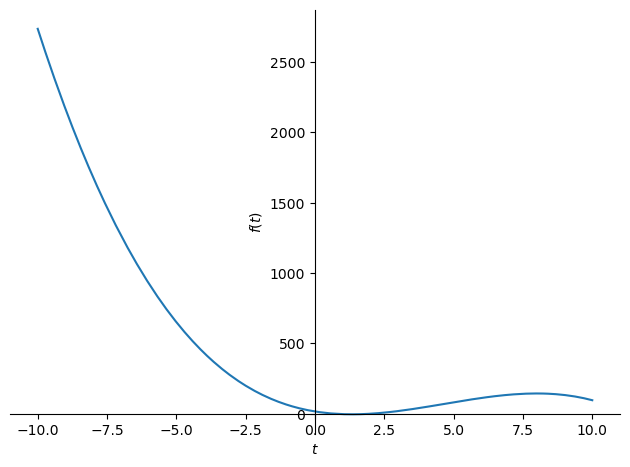

In [98]:
from sympy.abc import t
I = np.eye(3)
p = sym.det(sym.Matrix(A - t * I))
# sym.solve(p)
print("------p------------\n",p)
print("-----root----------\n",sym.solve(p))
p1 = sym.plot(p, (t, -10, 10), show=False)

p1.show()

------------p------------------
-1.0*t**3 + 21.0*t**2 - 65.0*t - 189.0
-------------------------------
------------roots------------------
[-1.78751922313492 + 0.e-22*I, 6.48615027225818 + 0.e-19*I, 16.3013689508767 - 0.e-21*I]
-------------------------------


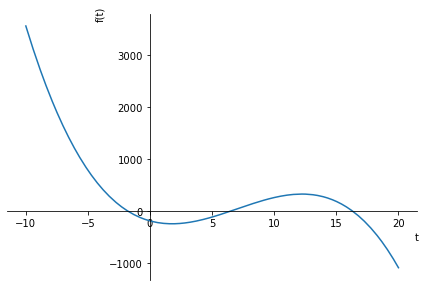

In [9]:
#typr your code here:


#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

### ---------------------------------------------------Write your answer here------------------------------------




P are eigenvectors, and the diagonal elements of D are the corresponding eigenvalues. 




### ------------------------------------------------------------------------------------------------------------------------

In [101]:
w, P = np.linalg.eig(A)
D = np.diag(w)
p1 = P[:, [0]]
p2 = P[:, [1]]
p3 = P[:, [2]]
a1=A @ p1 - D[0, 0] * p1
a2=A @ p2 - D[1, 1] * p2
a3=A @ p3 - D[2, 2] * p3
print("------------P------------------\n",p)
print("------------D------------------\n",D)
print("--------A @ p1 - D[0, 0] * p1-------------\n",a1)
print("--------A @ p2 - D[1, 1] * p2-------------\n",a2)
print("--------A @ p3 - D[2, 2] * p3-------------\n",a3)




------------P------------------
 -1.0*t**3 + 14.0*t**2 - 32.0*t + 16.0
------------D------------------
 [[ 0.70849738  0.          0.        ]
 [ 0.          2.          0.        ]
 [ 0.          0.         11.29150262]]
--------A @ p1 - D[0, 0] * p1-------------
 [[1.11022302e-16]
 [7.21644966e-16]
 [1.55431223e-15]]
--------A @ p2 - D[1, 1] * p2-------------
 [[-1.55431223e-15]
 [-6.66133815e-16]
 [ 1.55431223e-15]]
--------A @ p3 - D[2, 2] * p3-------------
 [[4.44089210e-15]
 [1.77635684e-15]
 [8.88178420e-16]]


In [10]:
#type your code here:


------------P------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------D------------------
[[16.30136895  0.          0.        ]
 [ 0.         -1.78751922  0.        ]
 [ 0.          0.          6.48615027]]
-------------------------------
------------A @ p1 - D[0, 0] * p1------------------
[[ 5.32907052e-15]
 [-5.32907052e-15]
 [-1.77635684e-15]]
---------------------------------------------------
------------A @ p2 - D[1, 1] * p2------------------
[[2.22044605e-16]
 [3.66373598e-15]
 [1.11022302e-15]]
---------------------------------------------------
------------A @ p3 - D[2, 2] * p3------------------
[[ 2.66453526e-15]
 [-4.44089210e-15]
 [-1.77635684e-15]]
---------------------------------------------------


#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [105]:

                       
A = P @ D @ np.linalg.inv(P)
print("--------A------------\n",A)
print("\n--------P @ D @ np.linalg.inv(P)------------\n",P @ D @ np.linalg.inv(P))
print("\n--------A^5------------\n", np.linalg.matrix_power(A, 5))
print("\n--------P @ D^5 @ P^-1------------\n",P @ ( np.linalg.matrix_power(D, 5)) @ np.linalg.inv(P))
tic1=time.time()
print("\n--------A^100------------\n", np.linalg.matrix_power(A, 100))
toc1=time.time()
time_taken1=toc1-tic1
tic2=time.time()
print("\n--------P @ D^100 @ P^-1------------\n",P @ ( np.linalg.matrix_power(D, 100)) @ np.linalg.inv(P))


--------A------------
 [[ 1.00000000e+00  7.00000000e+00  6.00000000e+00]
 [-3.55271368e-15  7.00000000e+00  5.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00  6.00000000e+00]]

--------P @ D @ np.linalg.inv(P)------------
 [[ 1.00000000e+00  7.00000000e+00  6.00000000e+00]
 [-3.55271368e-15  7.00000000e+00  5.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00  6.00000000e+00]]

--------A^5------------
 [[ 33016.  80400. 113384.]
 [ 27960.  68112.  96040.]
 [ 24072.  58352.  82456.]]

--------P @ D^5 @ P^-1------------
 [[ 33016.  80400. 113384.]
 [ 27960.  68112.  96040.]
 [ 24072.  58352.  82456.]]

--------A^100------------
 [[3.39360052e+104 8.24814904e+104 1.16417496e+105]
 [2.87455264e+104 6.98660270e+104 9.86115534e+104]
 [2.46723004e+104 5.99660476e+104 8.46383480e+104]]

--------P @ D^100 @ P^-1------------
 [[3.39360052e+104 8.24814904e+104 1.16417496e+105]
 [2.87455264e+104 6.98660270e+104 9.86115534e+104]
 [2.46723004e+104 5.99660476e+104 8.46383480e+104]]


In [11]:
#type your code here:
np.linalg.matrix_power(A, 5)
P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P)

------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------P @ D @ np.linalg.inv(P)------------------
[[ 4.00000000e+00  6.00000000e+00  7.00000000e+00]
 [ 9.00000000e+00  9.00000000e+00  8.00000000e+00]
 [ 3.00000000e+00 -1.90122146e-15  8.00000000e+00]]
-------------------------------
------------A^5------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------P @ D^5 @ P^-1------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------A^10------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901e+11 1.20451834e+12]
 [1.63488413e+11 1.34309576e+11 2.67408326e+11]]
-------------------------------
------------P @ D^10 @ P^-1------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901